In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets

In [2]:
file = "/Users/onur.serce/Data/MPIB/20240326_backup_slides/slideB_statsout"
mask_features = pd.read_csv(file, sep=";", on_bad_lines='warn')
mask_features.head()

,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,item id.1,Unnamed: 137
0,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,4,1,1,-3142.927979,-3324.078613,1124,...,0.049610,0.161265,0.0,0.0,0.0,0.0,1.0,1.0,4.0,NaN
1,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,6,1,1,-3087.943848,-3326.078857,475,...,0.045360,0.073630,0.0,0.0,0.0,0.0,1.0,2.0,6.0,NaN
2,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,7,1,1,-3165.250732,-3320.490479,1292,...,0.038061,0.101416,0.0,0.0,0.0,0.0,1.0,3.0,7.0,NaN
3,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,8,1,1,-2976.842285,-3313.589600,1471,...,0.034544,0.110516,0.0,0.0,0.0,0.0,1.0,4.0,8.0,NaN
4,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,9,1,1,-2931.696777,-3314.956299,253,...,0.026946,0.098503,0.0,0.0,0.0,0.0,1.0,5.0,9.0,NaN


## Cleaning and seperating the data per region

In [70]:
print(f"shape is {mask_features.shape} but the data contains duplicate columns")

shape is (202617, 137) but the data contains duplicate columns


In [4]:
# Drop duplicate columns

dup_cols = []

for col in mask_features.columns:
    if col.endswith(".1"):
        dup_cols.append(col)

# Drop it like it's hot!
mask_features.drop(dup_cols, axis=1, inplace=True)

print(f"shape is {mask_features.shape} after dropping duplicate columns")
mask_features.head()

shape is (202617, 137) after dropping duplicate columns


,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,Unnamed: 137
0,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,4,1,1,-3142.927979,-3324.078613,1124,...,0.150883,0.049610,0.161265,0.0,0.0,0.0,0.0,1.0,1.0,NaN
1,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,6,1,1,-3087.943848,-3326.078857,475,...,0.130159,0.045360,0.073630,0.0,0.0,0.0,0.0,1.0,2.0,NaN
2,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,7,1,1,-3165.250732,-3320.490479,1292,...,0.133473,0.038061,0.101416,0.0,0.0,0.0,0.0,1.0,3.0,NaN
3,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,8,1,1,-2976.842285,-3313.589600,1471,...,0.240660,0.034544,0.110516,0.0,0.0,0.0,0.0,1.0,4.0,NaN
4,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m10_c0_z1_l1_o0,items,9,1,1,-2931.696777,-3314.956299,253,...,0.037365,0.026946,0.098503,0.0,0.0,0.0,0.0,1.0,5.0,NaN


In [9]:
# Save data from each region into seperate csv files
 
for col in mask_features.columns:
    if col.startswith("REGION COMBINED"):
        region = "_".join(col.split(" ")[-2:])
        subdf = mask_features.loc[mask_features.loc[:, col] == True, :]
        subdf.to_csv(file + "_" + region + ".csv", sep=",")

##  Filtering

Following filtering and analysis will be done with only a single region (brain section).

### Region 2

In [5]:
# Continue with region 3

subdf = mask_features.loc[mask_features.loc[:, "REGION COMBINED Region 2"] == True, :]
df = subdf

### Filtering functions

In [6]:
def visualize_thresholds(df, variable, title, thresholds=None):
    """
    Convenience function to plot a distribution with thresholds
    :param variable: dataframe column
    :param title: plot title
    :param thresholds: list or tuple containing thresholds
    """
    
    plt.figure(figsize=(8, 4))
    sb.displot(data=df, x=variable, kind='kde')
    if thresholds is not None:
        if type(thresholds) is int:
            plt.axvline(x=thresholds[0], color='r', linestyle='--')
        elif len(thresholds) == 2:
            for threshold in thresholds:
                plt.axvline(x=threshold, color='r', linestyle='--')
        else:
            raise ValueError("Threshold should be an int or a list or a tuple containing two numbers")
    plt.title(title)
    plt.show()

In [7]:
def define_thresholds(df, variable):
    """
    Interactive version to plot a distribution with thresholds using ipywidgets
    :param df: DataFrame containing the data
    :param variable: dataframe column
    :param title: plot title
    """
    
    # Determine the range of the variable for the slider and convert to int
    min_val, max_val = int(df[variable].min()), int(df[variable].max())
    
    # Pre-calculate the KDE plot
    plt.figure(figsize=(8, 4))
    kde_plot = sb.kdeplot(data=df, x=variable)
    plt.close()  # Close the plot to prevent it from displaying now
    
    # Create an FloatRangeSlider for selecting thresholds
    thresholds_slider = widgets.FloatRangeSlider(
        value=[min_val, max_val],
        min=min_val,
        max=max_val,
        step=(max_val - min_val) / 100,
        description='Thresholds:',
        continuous_update=False
    )
    
    def update_plot(thresholds):
        """
        This function updates the plot based on the thresholds.
        """
        # Display the KDE plot
        fig, ax = plt.subplots(figsize=(8, 4))
        ax = kde_plot.get_lines()[0].get_xydata()
        plt.plot(ax[:,0], ax[:,1], label='Kernel density')
        
        # Plot the thresholds
        plt.axvline(x=thresholds[0], color='r', linestyle='-', label='Lower threshold')
        plt.axvline(x=thresholds[1], color='r', linestyle='--', label='Upper threshold')
        plt.title(variable)
        plt.legend()
        plt.show()
        globals()[variable] = thresholds
        print(globals()[variable])
    # Interactively update the plot when the slider value changes
    widgets.interact(update_plot, thresholds=thresholds_slider)

In [8]:
def subset_dataframe_by_thresholds(df, variable):
    """
    Return a subset of the DataFrame based on the given thresholds for a specific variable.
    
    Parameters:
    - df: pandas.DataFrame containing the data.
    - variable: String representing the column name to filter by.
    - thresholds: Tuple containing two numbers (lower_bound, upper_bound) representing the thresholds.
    
    Returns:
    - A subset of the original DataFrame where the values in the specified column fall within the given thresholds.
    
    # Example usage:
    # Assuming 'df' is your DataFrame, 'variable' is the column name, and 'thresholds' is the tuple of lower and upper bounds.
    # subsetted_df = subset_dataframe_by_thresholds(df, 'your_variable_here', (lower_bound, upper_bound))
    # print(subsetted_df)
    """
    # Ensure that thresholds is a tuple with two elements
    thresholds = globals()[variable]
    if not isinstance(thresholds, tuple) or len(thresholds) != 2:
        raise ValueError("Thresholds must be a tuple with two elements (lower_bound, upper_bound).")
    
    lower_bound, upper_bound = thresholds
    
    # Filter the DataFrame
    filtered_df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    print(globals()[variable])
    return filtered_df

In [9]:
define_thresholds(df, variable='CELL CIRCULARITY')

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='Thresholds:', m…

In [10]:
circular = df[(df['CELL CIRCULARITY'] > 0.75)]
print(f"From total of {len(df)} cells, {len(df)-len(circular)} cells removed due to high cell circulation. Remaining: {len(circular)}")

From total of 39551 cells, 6950 cells removed due to high cell circulation. Remaining: 32601


In [11]:
define_thresholds(circular, variable='CELL AREA')

interactive(children=(FloatRangeSlider(value=(30.0, 5111.0), continuous_update=False, description='Thresholds:…

In [12]:
print(globals()['CELL AREA'])

(250.0, 1600.0)


In [13]:
good_size = subset_dataframe_by_thresholds(circular, 'CELL AREA')
print(f"From total of {len(circular)} cells, {len(circular)-len(good_size)} cells removed due to their size. Remaining: {len(good_size)}")

(250.0, 1600.0)
From total of 32601 cells, 6351 cells removed due to their size. Remaining: 26250


In [14]:
define_thresholds(good_size, variable='CELL INTENSITY-MIN AF555')

interactive(children=(FloatRangeSlider(value=(40.0, 14302.0), continuous_update=False, description='Thresholds…

In [15]:
min_threshold_555 = subset_dataframe_by_thresholds(good_size, 'CELL INTENSITY-MIN AF555')
print(f"From total of {len(good_size)} cells, {len(good_size)-len(min_threshold_555)} cells removed due MIN AF555. Remaining: {len(min_threshold_555)}")

(1467.0, 14302.0)
From total of 26250 cells, 511 cells removed due MIN AF555. Remaining: 25739


In [16]:
define_thresholds(min_threshold_555, variable='CELL INTENSITY-MEAN AF555')

interactive(children=(FloatRangeSlider(value=(1799.0, 16278.0), continuous_update=False, description='Threshol…

In [17]:
mean_threshold_555 = subset_dataframe_by_thresholds(min_threshold_555, 'CELL INTENSITY-MEAN AF555')
print(f"From total of {len(min_threshold_555)} cells, {len(min_threshold_555)-len(mean_threshold_555)} cells removed due to MEAN AF555. Remaining: {len(mean_threshold_555)}")

(3391.0, 16278.0)
From total of 25739 cells, 10627 cells removed due to MEAN AF555. Remaining: 15112


In [18]:
define_thresholds(mean_threshold_555, variable='CELL INTENSITY-MEDIAN AF555')

interactive(children=(FloatRangeSlider(value=(2592.0, 16383.0), continuous_update=False, description='Threshol…

In [19]:
median_threshold_555 = subset_dataframe_by_thresholds(mean_threshold_555, 'CELL INTENSITY-MEDIAN AF555')
print(f"From total of {len(mean_threshold_555)} cells, {len(mean_threshold_555)-len(median_threshold_555)} cells removed due MEDIAN AF555. Remaining: {len(median_threshold_555)}")

(3695.2799999999997, 16383.0)
From total of 15112 cells, 5035 cells removed due MEDIAN AF555. Remaining: 10077


In [20]:
define_thresholds(median_threshold_555, variable='CELL INTENSITY-INTEGRATED AF555')

interactive(children=(FloatRangeSlider(value=(9702261.0, 41347489792.0), continuous_update=False, description=…

In [21]:
integrated_threshold_555 = subset_dataframe_by_thresholds(median_threshold_555, 'CELL INTENSITY-INTEGRATED AF555')
print(f"From total of {len(median_threshold_555)} cells, {len(median_threshold_555)-len(integrated_threshold_555)} cells removed due INTEGRATED AF555. Remaining: {len(integrated_threshold_555)}")

(836458011.62, 41347489792.0)
From total of 10077 cells, 6083 cells removed due INTEGRATED AF555. Remaining: 3994


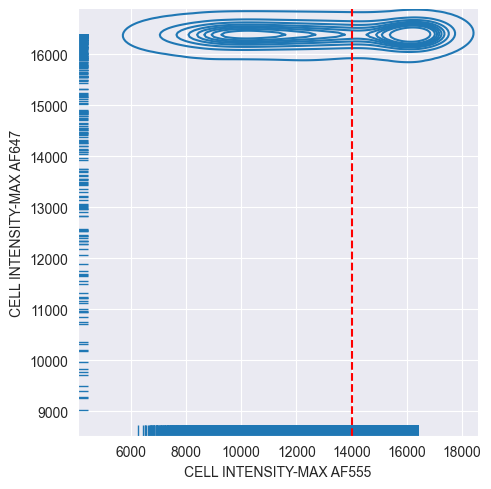

In [22]:
sb.displot(data=integrated_threshold_555, x="CELL INTENSITY-MAX AF555", y="CELL INTENSITY-MAX AF647", kind='kde', rug="True")
plt.axvline(x=14000, color='r', linestyle='--')

In [27]:
len(integrated_threshold_555)

3994

In [28]:
high_555_signal = integrated_threshold_555[integrated_threshold_555['CELL INTENSITY-MAX AF555'] > 14000]
print(len(high_555_signal))

1581


In [29]:
integrated_threshold_555[integrated_threshold_555['CELL INTENSITY-MAX AF555'] < 14000]

,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,Unnamed: 137
42314,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m400_c0_z1_l1_o0,items,16,89,89,-1891.752319,-23966.175781,344,...,0.143719,0.076941,0.208904,0.0,0.0,1.0,0.0,0.0,42315.0,NaN
42330,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m400_c0_z1_l1_o0,items,32,89,89,-1960.151978,-23836.412109,460,...,0.167186,0.149076,0.205751,0.0,0.0,1.0,0.0,0.0,42331.0,NaN
44740,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,153,95,95,-7127.429688,-22376.074219,774,...,0.164069,0.166381,0.203603,0.0,0.0,1.0,0.0,0.0,44741.0,NaN
44753,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,166,95,95,-7146.856445,-22362.554688,548,...,0.120178,0.053862,0.142615,0.0,0.0,1.0,0.0,0.0,44754.0,NaN
44784,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,200,95,95,-7067.132324,-22335.591797,1036,...,0.171894,0.023146,0.159147,0.0,0.0,1.0,0.0,0.0,44785.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199627,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,58,470,470,-7526.964844,-24964.376953,1465,...,0.010617,0.028975,0.090470,0.0,0.0,1.0,0.0,0.0,199628.0,NaN
199647,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,79,470,470,-7649.780762,-24950.777344,260,...,0.143775,0.032840,0.180137,0.0,0.0,1.0,0.0,0.0,199648.0,NaN
199663,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,95,470,470,-7172.482422,-24932.115234,819,...,0.036403,0.073199,0.209931,0.0,0.0,1.0,0.0,0.0,199664.0,NaN
199738,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,182,470,470,-7252.605469,-24813.503906,911,...,0.028404,0.030920,0.084999,0.0,0.0,1.0,0.0,0.0,199739.0,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


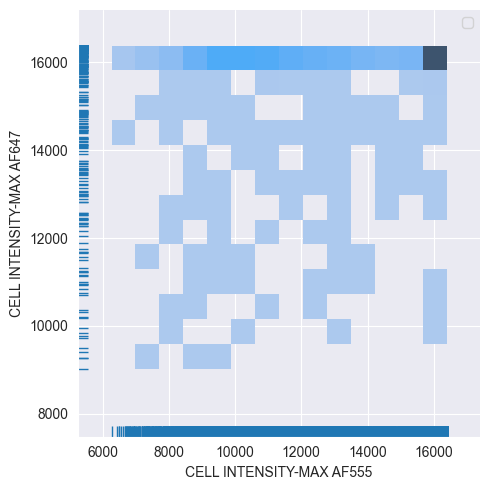

In [30]:
sb.displot(data=integrated_threshold_555, x="CELL INTENSITY-MAX AF555", y="CELL INTENSITY-MAX AF647", rug="True")
plt.legend()

In [48]:
high_555_signal

,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,Unnamed: 137
44656,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,49,95,95,-7033.807129,-22445.248047,556,...,0.085478,0.034645,0.136210,0.0,0.0,1.0,0.0,0.0,44657.0,NaN
44670,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,74,95,95,-7106.711914,-22429.767578,923,...,0.178659,0.025422,0.209225,0.0,0.0,1.0,0.0,0.0,44671.0,NaN
44702,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,113,95,95,-7109.700195,-22405.738281,711,...,0.192377,0.031346,0.209856,0.0,0.0,1.0,0.0,0.0,44703.0,NaN
44704,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,115,95,95,-7409.506348,-22404.863281,1075,...,0.127939,0.037525,0.127899,0.0,0.0,1.0,0.0,0.0,44705.0,NaN
44734,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,147,95,95,-7364.495605,-22380.455078,1048,...,0.145795,0.039726,0.169230,0.0,0.0,1.0,0.0,0.0,44735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199733,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,177,470,470,-7154.093750,-24822.787109,496,...,0.053558,0.052087,0.081629,0.0,0.0,1.0,0.0,0.0,199734.0,NaN
199736,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,180,470,470,-7286.207520,-24817.599609,965,...,0.018872,0.059079,0.155367,0.0,0.0,1.0,0.0,0.0,199737.0,NaN
199744,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,188,470,470,-7244.534668,-24806.484375,783,...,0.032476,0.063305,0.093131,0.0,0.0,1.0,0.0,0.0,199745.0,NaN
199746,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,190,470,470,-7295.278809,-24805.242188,542,...,0.022872,0.082915,0.061553,0.0,0.0,1.0,0.0,0.0,199747.0,NaN


In [32]:
strong_555_positive = high_555_signal

In [33]:
strong_555_positive

,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,Unnamed: 137
44656,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,49,95,95,-7033.807129,-22445.248047,556,...,0.085478,0.034645,0.136210,0.0,0.0,1.0,0.0,0.0,44657.0,NaN
44670,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,74,95,95,-7106.711914,-22429.767578,923,...,0.178659,0.025422,0.209225,0.0,0.0,1.0,0.0,0.0,44671.0,NaN
44702,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,113,95,95,-7109.700195,-22405.738281,711,...,0.192377,0.031346,0.209856,0.0,0.0,1.0,0.0,0.0,44703.0,NaN
44704,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,115,95,95,-7409.506348,-22404.863281,1075,...,0.127939,0.037525,0.127899,0.0,0.0,1.0,0.0,0.0,44705.0,NaN
44734,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,147,95,95,-7364.495605,-22380.455078,1048,...,0.145795,0.039726,0.169230,0.0,0.0,1.0,0.0,0.0,44735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199733,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,177,470,470,-7154.093750,-24822.787109,496,...,0.053558,0.052087,0.081629,0.0,0.0,1.0,0.0,0.0,199734.0,NaN
199736,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,180,470,470,-7286.207520,-24817.599609,965,...,0.018872,0.059079,0.155367,0.0,0.0,1.0,0.0,0.0,199737.0,NaN
199744,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,188,470,470,-7244.534668,-24806.484375,783,...,0.032476,0.063305,0.093131,0.0,0.0,1.0,0.0,0.0,199745.0,NaN
199746,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,190,470,470,-7295.278809,-24805.242188,542,...,0.022872,0.082915,0.061553,0.0,0.0,1.0,0.0,0.0,199747.0,NaN


In [34]:
strong_555_positive = strong_555_positive['rowid'].to_list()

In [42]:
high_555_signal.describe()[['CELL AREA', 'CELL CIRCULARITY', 'CELL INTENSITY-MEDIAN AF647', 'CELL INTENSITY-MEAN AF647']]v

,CELL AREA,CELL CIRCULARITY,CELL INTENSITY-MEDIAN AF647,CELL INTENSITY-MEAN AF647
count,1581.000000,1581.000000,1581.000000,1581.000000
mean,991.749526,0.858041,15462.535737,14818.824155
std,316.687880,0.048867,1809.507075,1591.760896
min,253.000000,0.750329,5986.000000,6123.803223
25%,766.000000,0.821282,15400.500000,14389.444336
50%,987.000000,0.861496,16383.000000,15380.950195
75%,1247.000000,0.896610,16383.000000,15833.488281
max,1600.000000,1.001145,16383.000000,16383.000000


In [36]:
high_555_excluded = df.drop(high_555_signal.index)

In [37]:
prefiltered = high_555_excluded[high_555_excluded['CELL AREA'].between(253, 1600, inclusive='both')]
prefiltered = prefiltered[prefiltered['CELL CIRCULARITY'] > 0.75]
prefiltered = prefiltered[prefiltered['CELL INTENSITY-MEDIAN AF647'].between(5986, 16383, inclusive='both')]

In [38]:
system("jupyter" "notebook" "list")

['Currently running servers:',
 'http://localhost:8888/?token=6b990d4b2ac47e0be0facdc2805c06025c22226084dd51cd :: /Users/onur.serce/PycharmProjects/DVPtools']

In [39]:
define_thresholds(prefiltered, variable='CELL INTENSITY-INTEGRATED AF555')

interactive(children=(FloatRangeSlider(value=(1293145.0, 17001706496.0), continuous_update=False, description=…

In [43]:
final_555_neg = subset_dataframe_by_thresholds(prefiltered, 'CELL INTENSITY-INTEGRATED AF555')
print(len(final_555_neg))

(1293145.0, 171297278.51)
7079


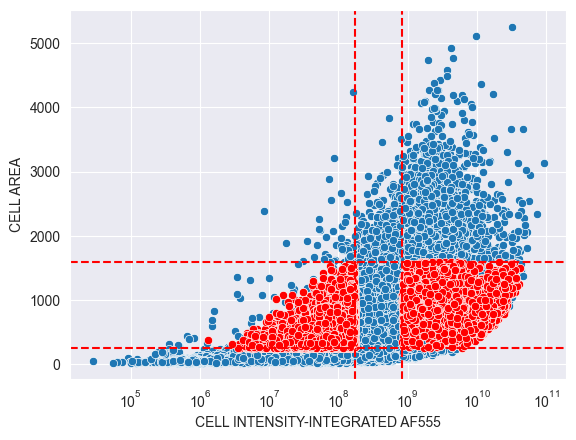

In [64]:
sb.scatterplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.scatterplot(data=final_555_neg, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')
sb.scatterplot(data=high_555_signal, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')

plt.axhline(y=253, linestyle='--', c='r')
plt.axhline(y=1600, linestyle='--', c='r')
plt.axvline(x=high_555_signal['CELL INTENSITY-INTEGRATED AF555'].min(), linestyle='--', c='r')
plt.axvline(x=final_555_neg['CELL INTENSITY-INTEGRATED AF555'].max(), linestyle='--', c='r')

plt.xscale('log')

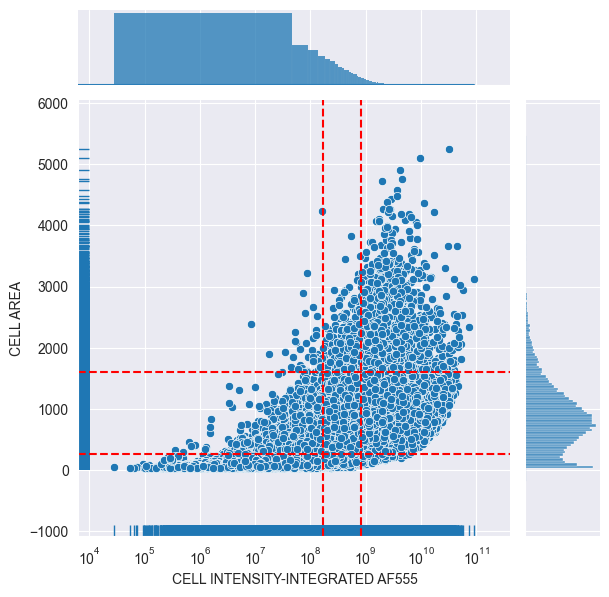

In [65]:
g = sb.jointplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.rugplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
g.plot_marginals(sb.kdeplot)

plt.axhline(y=253, linestyle='--', c='r')
plt.axhline(y=1600, linestyle='--', c='r')
plt.axvline(x=high_555_signal['CELL INTENSITY-INTEGRATED AF555'].min(), linestyle='--', c='r')
plt.axvline(x=final_555_neg['CELL INTENSITY-INTEGRATED AF555'].max(), linestyle='--', c='r')

plt.xscale('log')

This notebook was used up until this point for preparing PR3, which happened on 22.05.24 (23.05.2024)

In [97]:
(25 + 50 + 125 + 250 + 500 + 1000) * 3

5850

In [101]:
final_555_neg

,series,path,name,type,item id,fm id,il id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV AF800,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 4,REGION COMBINED Region 3,REGION COMBINED Region 2,REGION COMBINED Region 1,REGION COMBINED Region 5,rowid,Unnamed: 137
42316,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m400_c0_z1_l1_o0,items,18,89,89,-1819.485107,-23925.392578,361,...,0.061881,0.033769,0.223151,0.0,0.0,1.0,0.0,0.0,42317.0,NaN
44637,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,11,95,95,-7388.028809,-22465.544922,1050,...,0.228350,0.053470,0.176697,0.0,0.0,1.0,0.0,0.0,44638.0,NaN
44649,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,37,95,95,-7608.626953,-22455.708984,600,...,0.132257,0.035040,0.138501,0.0,0.0,1.0,0.0,0.0,44650.0,NaN
44650,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,38,95,95,-7022.028320,-22452.531250,562,...,0.114811,0.046173,0.031657,0.0,0.0,1.0,0.0,0.0,44651.0,NaN
44651,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m410_c0_z1_l1_o0,items,40,95,95,-7259.765137,-22451.365234,494,...,0.118526,0.028373,0.163114,0.0,0.0,1.0,0.0,0.0,44652.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199658,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,90,470,470,-7282.640625,-24941.535156,337,...,0.102273,0.029247,0.018738,0.0,0.0,1.0,0.0,0.0,199659.0,NaN
199662,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,94,470,470,-7328.471191,-24937.666016,499,...,0.042938,0.029381,0.030612,0.0,0.0,1.0,0.0,0.0,199663.0,NaN
199666,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,99,470,470,-7192.584961,-24931.951172,689,...,0.079244,0.035221,0.219502,0.0,0.0,1.0,0.0,0.0,199667.0,NaN
199704,20240326_Onur_NG_555cFos_647NeuN_800Gad67_slid...,Items,p1_wA1_t1_m587_c0_z1_l1_o0,items,142,470,470,-7537.295410,-24862.175781,344,...,0.015500,0.019112,0.141300,0.0,0.0,1.0,0.0,0.0,199705.0,NaN


In [102]:
final_555_neg = final_555_neg['rowid'].to_list()

In [104]:
weak_555_negative = final_555_neg

In [105]:
len(strong_555_positive)

1581

In [106]:
len(weak_555_negative)

7079

In [107]:
from copy import deepcopy
from random import shuffle

strong_555_positive_copy = deepcopy(strong_555_positive)
weak_555_negative_copy = deepcopy(weak_555_negative)
shuffle(strong_555_positive_copy)
shuffle(weak_555_negative_copy)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

subset_dict = {'strong_555_pos': [], 'weak_555_neg': []}

start_val = 500
reps = 3
groups = 1

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(strong_555_positive_copy.pop()))
        subset_dict['strong_555_pos'].append(alist)
    start_val = int(start_val/2)

start_val = 1000
reps = 3
groups = 7

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(weak_555_negative_copy.pop()))
        subset_dict['weak_555_neg'].append(alist)
    start_val = int(start_val/2)

length strong_555_positive_copy 1581
length weak_555_negative_copy 7079


In [108]:
for l in subset_dict['strong_555_pos']:
    print(len(l))
    
print(len(strong_555_positive_copy))

500
500
500
81


In [89]:
pretext = "SELECT \'Item lists\'.\'il id\', \'Item lists\'.\'series\', \'Item lists\'.\'path\', \'Item lists\'.\'name\', \'Item lists\'.\'type\', \'Item lists\'.\'plate\', \'Item lists\'.\'well\', \'Region features\'.\'rowid\', \'Region features\'.\'item id\', \'Region features\'.\'fm id\', \'Region features\'.\'il id\'\nFROM \'Region features\'\nINNER JOIN \'Item lists\' ON \'Item lists\'.\'il id\' = \'Region features\'.\'il id\'\nWHERE "

for k,v in subset_dict.items():
   for i,ind in enumerate(v):
       if len(ind)>0:
           outtext = pretext + ''.join(["\'Region features\'.\'rowid\' = \'{}\' OR ".format(x) for x in subset_dict[k][i]])
           sql_out = outtext.rstrip(' OR ')
           outname = '/Users/onurserce/MPIB/20240125_MPIB_15um/{}_{}_{}_sqlQuery.sql'.format(k,i,len(ind))
           with open(outname, 'w') as f:
               f.write(sql_out)



Have sent the output SQL files to Edwin on 14.03.2024. We'll meet next week on Tuesday and Wednesday to deal with the LMD and start cutting.

- Need to prioritize mask matching (Pia's code)
- Remind Edwin to look for the slide (tomorrow morning and also on Monday)

My conclusion:

Not enough cFOS positive cells (at least within the Region 3).

Ok, so the alternative is to make the titration curve from cells that are not cFOS positive (since we have a ton), and then just make a triplicate from the top X cFOS positive cells (X has to be a number that is in the titration curve, so that I can compare the data by)

In [110]:
area_and_sytog_filtered_sorted = area_and_sytog_filtered.sort_values(['CELL INTENSITY-INTEGRATED AF555'], ascending=False)

<Axes: xlabel='CELL INTENSITY-INTEGRATED AF555', ylabel='CELL AREA'>

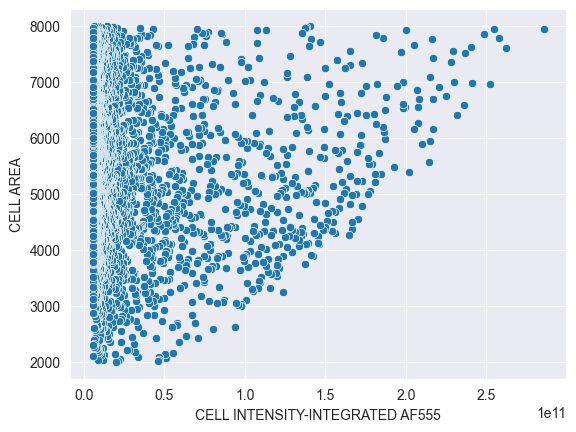

In [115]:
sb.scatterplot(data=area_and_sytog_filtered_sorted[:3000], x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')

In [124]:
area_and_sytog_filtered_sorted_AF555_top3000 = area_and_sytog_filtered_sorted[:3000]
area_and_sytog_filtered_sorted_AF555_top3000

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
114412,171,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m351_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.292245,0.143465,0,0.0,0.0,0,1.0,114415.0,171.0,NaN
159019,238,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m382_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.241130,0.099707,0,0.0,0.0,0,1.0,159022.0,238.0,NaN
367275,568,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m339_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.126649,0.121222,0,0.0,0.0,0,1.0,367282.0,568.0,NaN
371142,574,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m349_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.062442,0.115606,0,0.0,0.0,0,1.0,371149.0,574.0,NaN
297986,461,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m337_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.110366,0.104415,0,0.0,0.0,0,1.0,297993.0,461.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383533,597,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m389_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.315752,0.072754,0,0.0,0.0,0,1.0,383542.0,597.0,NaN
274794,420,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m356_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.132812,0.084052,0,0.0,0.0,0,1.0,274801.0,420.0,NaN
174596,264,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m333_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.039590,0.043385,0,0.0,0.0,0,1.0,174599.0,264.0,NaN
219022,335,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m374_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.045172,0.202989,0,0.0,0.0,0,1.0,219027.0,335.0,NaN


In [122]:
from scipy.stats import pearsonr

pearsonr(x=area_and_sytog_filtered_sorted_top3000['CELL INTENSITY-INTEGRATED AF555'],
         y=area_and_sytog_filtered_sorted_top3000['CELL AREA'],
         alternative='two-sided', method=None)

PearsonRResult(statistic=-0.0011585467694318454, pvalue=0.9494242611767699)

In [123]:
pearsonr(x=subdf['CELL INTENSITY-INTEGRATED AF555'],
         y=subdf['CELL AREA'],
         alternative='two-sided', method=None)

PearsonRResult(statistic=0.18039581271694313, pvalue=0.0)

In [137]:
subdf['CELL AREA'].quantile(0.98)

10581.300000000003

In [138]:
subdf['CELL AREA'].quantile(0.98)

10581.300000000003

In [139]:
subdf['CELL INTENSITY-INTEGRATED AF555'].quantile(0.98)

14446116454.400043

In [184]:
selected = subdf.loc[(subdf['CELL INTENSITY-INTEGRATED AF555'] > 14446116454) & (subdf['CELL AREA'].between(3307, 10581))]
selected

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60932,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.173268,0.099368,0,0.0,0.0,0,1.0,60935.0,91.0,NaN
60951,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.140380,0.057854,0,0.0,0.0,0,1.0,60954.0,91.0,NaN
61000,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.072057,0.113374,0,0.0,0.0,0,1.0,61003.0,91.0,NaN
61208,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.231407,0.111357,0,0.0,0.0,0,1.0,61211.0,91.0,NaN
61347,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.130253,0.137259,0,0.0,0.0,0,1.0,61350.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386850,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.112668,0.130737,0,0.0,0.0,0,1.0,386859.0,601.0,NaN
386944,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.155744,0.121143,0,0.0,0.0,0,1.0,386953.0,601.0,NaN
387087,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.056135,0.151583,0,0.0,0.0,0,1.0,387096.0,601.0,NaN
387107,601,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m299_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.097198,0.101589,0,0.0,0.0,0,1.0,387116.0,601.0,NaN


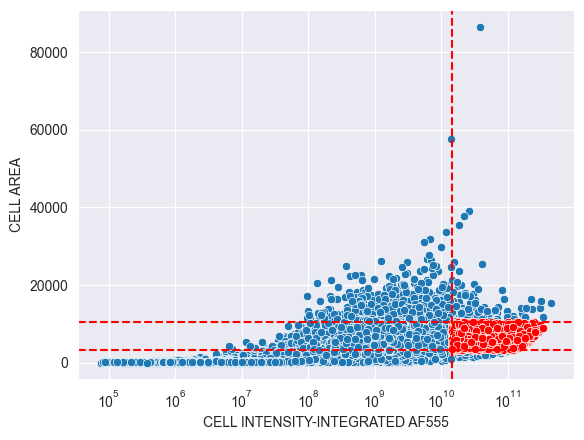

In [189]:
sb.scatterplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.scatterplot(data=selected, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')

plt.axhline(y=10581, linestyle='--', c='r')
plt.axhline(y=3307, linestyle='--', c='r')
plt.axvline(x=14446116454, linestyle='--', c='r')

plt.xscale('log')

In [194]:
selected.to_csv('/Users/onurserce/MPIB/20240125_MPIB_15um/selected_555_positive.csv', index=True)

In [202]:
define_thresholds(subdf, 'CELL INTENSITY-MEAN AF555')

interactive(children=(FloatRangeSlider(value=(314.0, 15331.0), continuous_update=False, description='Threshold…

In [209]:
af555_negative = subdf.loc[(subdf['CELL INTENSITY-INTEGRATED AF555'] < 1e9) & (subdf['CELL AREA'].between(3307, 10581) & (subdf['CELL INTENSITY-MEAN AF555'] < 4000))]
af555_negative.to_csv('/Users/onurserce/MPIB/20240125_MPIB_15um/af555_negative.csv', index=True)
af555_negative

,il id,series,path,name,type,plate,well,well_row,well_column,timepoint,...,CELL WINDOWED-INTENSITY-STDDEV AF647,CELL WINDOWED-INTENSITY-STDDEV SYTOG,REGION COMBINED Region 1,REGION COMBINED Region 4,REGION COMBINED Region 5,REGION COMBINED Region 2,REGION COMBINED Region 3,rowid,il id.2,Unnamed: 230
60779,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.133397,0.099521,0,0.0,0.0,0,1.0,60782.0,91.0,NaN
60781,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.052654,0.071948,0,0.0,0.0,0,1.0,60784.0,91.0,NaN
60783,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.112227,0.066198,0,0.0,0.0,0,1.0,60786.0,91.0,NaN
60790,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,-0.011154,0.007132,0,0.0,0.0,0,1.0,60793.0,91.0,NaN
60797,91,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m300_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.047657,0.040388,0,0.0,0.0,0,1.0,60800.0,91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387400,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.050466,0.226810,0,0.0,0.0,0,1.0,387409.0,602.0,NaN
387402,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.082055,0.121275,0,0.0,0.0,0,1.0,387411.0,602.0,NaN
387403,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.043846,0.154746,0,0.0,0.0,0,1.0,387412.0,602.0,NaN
387404,602,20240125_Onur_15um_NG_555cfos_647neun-_EDFvar-...,Items_NeuN_dedup,p1_wA1_t1_m399_c0_z1_l1_o0,items,1,A1,1,1,1,...,0.042914,0.144523,0,0.0,0.0,0,1.0,387413.0,602.0,NaN


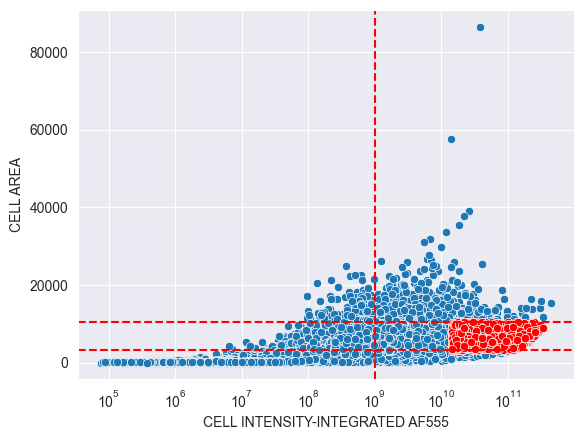

In [205]:
sb.scatterplot(data=subdf, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA')
sb.scatterplot(data=selected, x='CELL INTENSITY-INTEGRATED AF555', y='CELL AREA', color='r')

plt.axhline(y=10581, linestyle='--', c='r')
plt.axhline(y=3307, linestyle='--', c='r')
plt.axvline(x=1e9, linestyle='--', c='r')

plt.xscale('log')

In [215]:
strong_555_positive = selected['rowid'].to_list()
strong_555_negative = af555_negative['rowid'].to_list()

In [109]:
strong_555_positive_copy = deepcopy(strong_555_positive)
weak_555_negative_copy = deepcopy(weak_555_negative)
shuffle(strong_555_positive_copy)
shuffle(weak_555_negative_copy)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

subset_dict = {'strong_555_pos': [], 'weak_555_neg': []}

start_val = 500
reps = 3
groups = 1

for g in range(groups):
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(start_val):
            alist.append(int(strong_555_positive_copy.pop()))
        subset_dict['strong_555_pos'].append(alist)
    start_val = int(start_val/2)

print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

length strong_555_positive_copy 1581
length weak_555_negative_copy 7079
length strong_555_positive_copy 81
length weak_555_negative_copy 7079


In [110]:
reps = 3
groups = [1000, 500, 250, 125, 50, 25, 10]

for g in groups:
    print(g)
    for r in range(reps):
        alist = []
        entry = 'g'+str(g)+str('_r')+str(r)
        for i in range(g):
            alist.append(int(weak_555_negative_copy.pop()))
        subset_dict['weak_555_neg'].append(alist)
    
print('length strong_555_positive_copy', len(strong_555_positive_copy))
print('length weak_555_negative_copy', len(weak_555_negative_copy))

1000
500
250
125
50
25
10
length strong_555_positive_copy 81
length weak_555_negative_copy 1199


In [111]:
pretext = "SELECT \'Item lists\'.\'il id\', \'Item lists\'.\'series\', \'Item lists\'.\'path\', \'Item lists\'.\'name\', \'Item lists\'.\'type\', \'Item lists\'.\'plate\', \'Item lists\'.\'well\', \'Region features\'.\'rowid\', \'Region features\'.\'item id\', \'Region features\'.\'fm id\', \'Region features\'.\'il id\'\nFROM \'Region features\'\nINNER JOIN \'Item lists\' ON \'Item lists\'.\'il id\' = \'Region features\'.\'il id\'\nWHERE "

for k,v in subset_dict.items():
   for i,ind in enumerate(v):
       if len(ind)>0:
           outtext = pretext + ''.join(["\'Region features\'.\'rowid\' = \'{}\' OR ".format(x) for x in subset_dict[k][i]])
           sql_out = outtext.rstrip(' OR ')
           outname = '/Users/onur.serce/Data/MPIB/20240326_backup_slides/{}_{}_{}_sqlQuery.sql'.format(k,i,len(ind))
           with open(outname, 'w') as f:
               f.write(sql_out)

Sent the files to Edwin! (uploaded to DataShare)